# Deep Learning with Python: Chapter 3

In [7]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

import warnings
warnings.filterwarnings('ignore');

# TensorFlow and tf.keras
from tensorflow import keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

**Deep learning is a specific subfield of machine learning**: a new take on learning representations
from data that puts an emphasis on learning successive layers of increasingly
meaningful representations.

Deep learning, on the other hand, completely automates feature engineering:
with deep learning, you learn all features in one pass rather than having to engineer them yourself

These are the two essential characteristics of how deep learning learns from data:
the incremental, layer-by-layer way in which increasingly complex representations are developed,
and the fact that these intermediate incremental representations are learned jointly, each layer
being updated to follow both the representational needs of the layer above and the
needs of the layer below.

# Binary Classification: IMDB Dataset

In [12]:
# movie reviews are either positive (1) or negative (0)
from tensorflow.keras.datasets import imdb
# preprocessed as counts of word frequencies
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [18]:
train_data[0]
train_labels[0]
train_data.shape

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

1

(25000,)

In [19]:
# can decode back to english
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [20]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Data prep

In [21]:
# we need to turn lists of integers into tensors

# encode integer sequence as a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
x_train[0]
x_train[0].shape

array([0., 1., 1., ..., 0., 0., 0.])

(10000,)

In [24]:
# vectorize labels
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

# building model

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
# 16 hidden units in each of the two dense layers
# 16 dimensional representation space in each layer
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# binary classification - sigmoid activation to output probability
model.add(layers.Dense(1, activation='sigmoid'))

The dense layer has two linear operations: <br>
output = dot_product(W * input) + b

Activation functions: <br>
relu = rectified linear unit (non-linearity) allows the model to access a space of non-linear transformations 

In [37]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
# creating validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [39]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# 20 epochs = 20 iterations over all training samples
# mini-batches of 512 samples
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 743us/step - loss: 0.5232 - acc: 0.7899 - val_loss: 0.4061 - val_acc: 0.8545
Epoch 2/20
15000/15000 [==============================] - 4s 268us/step - loss: 0.3180 - acc: 0.8983 - val_loss: 0.3127 - val_acc: 0.8847
Epoch 3/20
15000/15000 [==============================] - 3s 230us/step - loss: 0.2313 - acc: 0.9256 - val_loss: 0.2856 - val_acc: 0.8885
Epoch 4/20
15000/15000 [==============================] - 4s 240us/step - loss: 0.1823 - acc: 0.9407 - val_loss: 0.2744 - val_acc: 0.8882
Epoch 5/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.1447 - acc: 0.9545 - val_loss: 0.2760 - val_acc: 0.8875
Epoch 6/20
15000/15000 [==============================] - 4s 253us/step - loss: 0.1200 - acc: 0.9628 - val_loss: 0.2890 - val_acc: 0.8864
Epoch 7/20
15000/15000 [==============================] - 3s 230us/step - loss: 0.0965 - acc: 0.9741 - val_loss: 0.3037 -

In [44]:
# history object contains training loop accuracy data
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

[0.7899333336194356,
 0.8982666666030884,
 0.925600000222524,
 0.9407333334604899,
 0.9544666667302449,
 0.9628000001271566,
 0.9740666663805644,
 0.9792000002543132,
 0.9841333331425984,
 0.9886666665712992,
 0.9922666669209799,
 0.9937333333333334,
 0.9953333333333333,
 0.9973333335876465,
 0.9987333333333334,
 0.9994666669209799,
 0.9998,
 0.9998,
 0.999,
 0.9999333333333333]

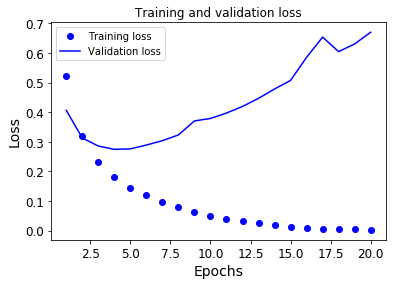

In [46]:
# plot training and validation loss
import matplotlib.pyplot as plt
# history object contains training loop accuracy data
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

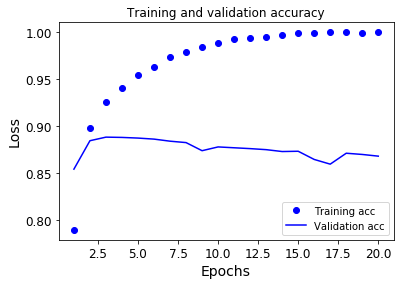

In [49]:
# plot training and validation accuracy
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

Our model overfits the training data, so we retrain a model on fewer epochs

In [50]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 168us/step - loss: 0.4313 - acc: 0.8252
Epoch 2/4
25000/25000 [==============================] - 4s 157us/step - loss: 0.2489 - acc: 0.9127
Epoch 3/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.1954 - acc: 0.9291
Epoch 4/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.1642 - acc: 0.9415


25000/25000 [==============================] - 5s 195us/step


In [51]:
results

[0.31126158588409425, 0.87672]

# experimenting with network parameters

In [52]:
model = models.Sequential()
# train with one dense layer with 32 units
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 192us/step - loss: 0.4212 - acc: 0.8337
Epoch 2/4
25000/25000 [==============================] - 4s 170us/step - loss: 0.2530 - acc: 0.9132
Epoch 3/4
25000/25000 [==============================] - 4s 161us/step - loss: 0.2000 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 4s 163us/step - loss: 0.1698 - acc: 0.9409


25000/25000 [==============================] - 4s 168us/step


In [53]:
results

[0.2987311220741272, 0.88024]

In [54]:
model = models.Sequential()
# train with three dense layers with 8 units
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 4s 161us/step - loss: 0.5233 - acc: 0.8124
Epoch 2/10
25000/25000 [==============================] - 4s 150us/step - loss: 0.3164 - acc: 0.9009
Epoch 3/10
25000/25000 [==============================] - 4s 150us/step - loss: 0.2320 - acc: 0.9218
Epoch 4/10
25000/25000 [==============================] - 4s 148us/step - loss: 0.1914 - acc: 0.9328
Epoch 5/10
25000/25000 [==============================] - 4s 145us/step - loss: 0.1653 - acc: 0.9419
Epoch 6/10
25000/25000 [==============================] - 4s 154us/step - loss: 0.1465 - acc: 0.9480 1s - l
Epoch 7/10
25000/25000 [==============================] - 4s 149us/step - loss: 0.1300 - acc: 0.9555
Epoch 8/10
25000/25000 [==============================] - 4s 145us/step - loss: 0.1166 - acc: 0.9602
Epoch 9/10
25000/25000 [==============================] - 4s 150us/step - loss: 0.1065 - acc: 0.9642
Epoch 10/10
25000/25000 [==============================] - 4s 151us/step - loss: 0.0

25000/25000 [==============================] - 3s 140us/step


In [55]:
results

[0.38720040828228, 0.86956]

In [56]:
model = models.Sequential()
# train with tanh activation function
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 4s 163us/step - loss: 0.4307 - acc: 0.8279
Epoch 2/10
25000/25000 [==============================] - 4s 148us/step - loss: 0.2343 - acc: 0.9135
Epoch 3/10
25000/25000 [==============================] - 4s 153us/step - loss: 0.1785 - acc: 0.9336
Epoch 4/10
25000/25000 [==============================] - 4s 159us/step - loss: 0.1461 - acc: 0.9472
Epoch 5/10
25000/25000 [==============================] - 4s 149us/step - loss: 0.1276 - acc: 0.9540
Epoch 6/10
25000/25000 [==============================] - 4s 151us/step - loss: 0.1130 - acc: 0.9598
Epoch 7/10
25000/25000 [==============================] - 4s 160us/step - loss: 0.1031 - acc: 0.9641
Epoch 8/10
25000/25000 [==============================] - 4s 162us/step - loss: 0.0906 - acc: 0.9688
Epoch 9/10
25000/25000 [==============================] - 4s 156us/step - loss: 0.0833 - acc: 0.9717
Epoch 10/10
25000/25000 [==============================] - 4s 148us/step - loss: 0.0764 - a

25000/25000 [==============================] - 4s 151us/step


In [57]:
results

[0.5251674690794945, 0.85548]

# Multiclass Classification: Reuters Dataset

46 different classes of news topics - text classification

In [59]:
from tensorflow.keras.datasets import reuters
# loaded as counts of word frequencies
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [60]:
train_data.shape
test_data.shape

(8982,)

(2246,)

In [62]:
# encoding as tensors
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [65]:
# use one-hot encoding of labels
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [66]:
# now we use more units per layer to avoid information loss or bottlenecks
# if class information lost at one layer it can't be recovered later
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# softmax for multiclass probabilities
model.add(layers.Dense(46, activation='softmax'))

In [67]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', # loss for multiclass
              metrics=['accuracy'])

In [68]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

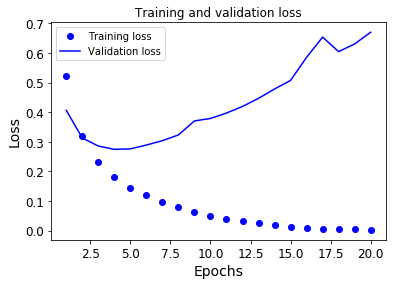

In [70]:
# plot validation and training loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

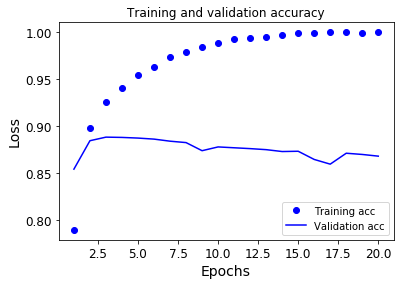

In [71]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [72]:
# retrain a model with fewer epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 314us/step - loss: 2.5671 - acc: 0.4965 - val_loss: 1.7041 - val_acc: 0.6180
Epoch 2/9
7982/7982 [==============================] - 2s 216us/step - loss: 1.4132 - acc: 0.6957 - val_loss: 1.2941 - val_acc: 0.7080
Epoch 3/9
7982/7982 [==============================] - 2s 217us/step - loss: 1.0429 - acc: 0.7801 - val_loss: 1.1292 - val_acc: 0.7620
Epoch 4/9
7982/7982 [==============================] - 2s 204us/step - loss: 0.8164 - acc: 0.8310 - val_loss: 1.0102 - val_acc: 0.7970
Epoch 5/9
7982/7982 [==============================] - 2s 207us/step - loss: 0.6443 - acc: 0.8675 - val_loss: 0.9575 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 2s 212us/step - loss: 0.5151 - acc: 0.8928 - val_loss: 0.9109 - val_acc: 0.8150
Epoch 7/9
7982/7982 [==============================] - 2s 209us/step - loss: 0.4119 - acc: 0.9154 - val_loss: 0.8784 - val_acc: 0.8260
Epoch 8

2246/2246 [==============================] - 0s 218us/step


[0.9758663786805748, 0.7898486198215535]

# Regression: Boston Housing Data

In [74]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [75]:
train_data.shape
test_data.shape
train_targets[:10]

(404, 13)

(102, 13)

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [76]:
# normalize data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [80]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    # don't need an activation, just use linear output for regression
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [81]:
# k-fold cross validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    all_scores.append(val_mae)

processing fold # 0


processing fold # 1


processing fold # 2


processing fold # 3


In [82]:
np.mean(all_scores)

2.5374171757462003

In [83]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 0s 2ms/step


2.4827435063380823

# Reducing overfitting 

- L1, L2 weight regularization
- Dropout (zero out a random subset of training outputs)
- Change model architecture (remove layers, units within layers)
- Gather more training data, engineer new features